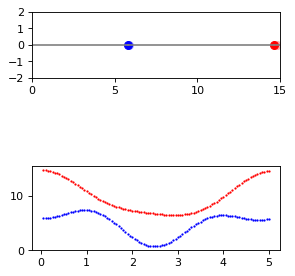

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display

# Function to get acceleration of the masses, based off of Newtonian Mechanics. The variable 'a1' refers to the 
# acceleration of the first mass, while the 'a2' variable refers to the acceleration of the second mass.
def acc(m1,m2,k1,k2,k3,x1,x2):
    a1 = (-(k1 + k2)*x1 + k2*x2)/m1;
    a2 = (-(k2 + k3)*x2 + k2*x1)/m2;
    
    return a1, a2;
    
def main():
    
    # defining necessary variables for the simulation. 
    t = 0;
    tf = 5;
    dt = 0.05;
    N = int(np.ceil(tf/dt));
    plotRealTime = True;
    
    # defining the physical variables.
    x1_eq = 5;
    x1 = random.random()*5;
    x1_total = x1_eq + x1;
    x2_eq = 10
    x2 = random.random()*5;
    x2_total = x2_eq + x2;
    
    x1s = x1_total;
    x2s = x2_total;
    
    m1 = random.randint(1,50);
    m2 = random.randint(1,50);
    k1 = random.randint(10,100);
    k2 = random.randint(10,100);
    k3 = random.randint(10,100);
    
    # objects are released at rest.
    vl1 = 0;
    vl2 = 0;
    acl = acc(m1,m2,k1,k2,k3,x1,x2);
    acl1 = acl[0];
    acl2 = acl[1];
    
    # creating the plots and turning interactive plotting on to animate our results.
    plt.ion();
    fig = plt.figure(figsize=(4,5), dpi=80);
    grid = plt.GridSpec(3, 1, wspace=0.0, hspace=0.3);
    ax1 = fig.add_subplot(grid[0:2,0]);
    ax2 = fig.add_subplot(grid[2,0]);

    
    for i in range(N):
        
        # updating 'x1' and 'x2' based on the acceleration function created above and using the leapfrog integration technique.
        x1_total += vl1*dt + 0.5*acl1*dt**2;
        vl1 += acl1*dt/2.0;
        x2_total += vl2*dt + 0.5*acl2*dt**2;
        vl2 += acl2*dt/2.0;
        
        acl = acc(m1,m2,k1,k2,k3,x1_total - x1_eq,x2_total - x2_eq);
        acl1 = acl[0];
        acl2 = acl[1];
        vl1 += acl1*dt/2.0;
        vl2 += acl2*dt/2.0;
        t += dt;
                
        if plotRealTime or (i == N-1):
            
            # clear graphs for every iteration and plot the positions of the pendulums (with the strings drawn)
            # the position is plotted as 'y' vs. 'x'.
            plt.sca(ax1);
            plt.cla();
            
            ax1.scatter(x1s,0,s=50,color=[0.7,0.7,1]);
            ax1.scatter(x2s,0,s=50,color=[1,0.7,0.7]);
            ax1.scatter(x1_total,0,s=50,color='blue');
            ax1.scatter(x2_total,0,s=50,color='red');
            
            sp1 = [0,x1_total];
            sp2 = [x1_total,x2_total];
            sp3 = [x2_total,15];
            y = [0,0];
            
            ax1.plot(sp1, y, color = 'grey');
            ax1.plot(sp2, y, color = 'grey');
            ax1.plot(sp3, y, color = 'grey');
            
            ax1.set(xlim=(0, 15), ylim=(-2, 2));
            ax1.set_aspect('equal', 'box');
            ax1.set_xticks([0,5,10,15]);
            ax1.set_yticks([-2,-1,0,1,2]);
            
            # graph the second plot with the position 'x' with respect to time.
            plt.sca(ax2)
            plt.scatter(t,x1_total,color='blue',s=1);
            plt.scatter(t,x2_total,color='red',s=1);
            
            # the part of the code that animates results rather than plotting a graph for each iteration of the 'for' loop.
            display.display(plt.gcf());
            display.clear_output(wait=True);
            fig.canvas.draw();
            fig.canvas.flush_events();
            
    return 0;

if __name__== "__main__":
    main()